In [28]:
#In this notebook I try to find features with mutual information and only using those to train 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

In [15]:
X = pd.read_csv('train.csv',index_col = 'id')
X_test_full = pd.read_csv('test.csv', index_col = 'id')

In [16]:
# dropping rows for null values in target

X.dropna(axis=0, subset=['target'], inplace=True)
y = X.target              
X.drop(['target'], axis=1, inplace=True)


In [5]:
X.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [4]:
# Setup feedback system
# from learntools.core import binder
# binder.bind(globals())
# from learntools.feature_engineering_new.ex2 import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


# # Load data
# df = pd.read_csv("../input/fe-course-data/ames.csv")


# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

cont12    0.021699
cont10    0.018486
cont9     0.012104
cont2     0.009703
cont7     0.009526
cont4     0.008801
cont8     0.008054
cat5      0.007753
cont0     0.007357
cat8      0.006478
cont6     0.005716
cont11    0.005455
cont3     0.004985
cat1      0.004302
cont5     0.003953
cont13    0.001485
cat9      0.001387
cat0      0.001341
cont1     0.001251
cat7      0.000839
Name: MI Scores, dtype: float64


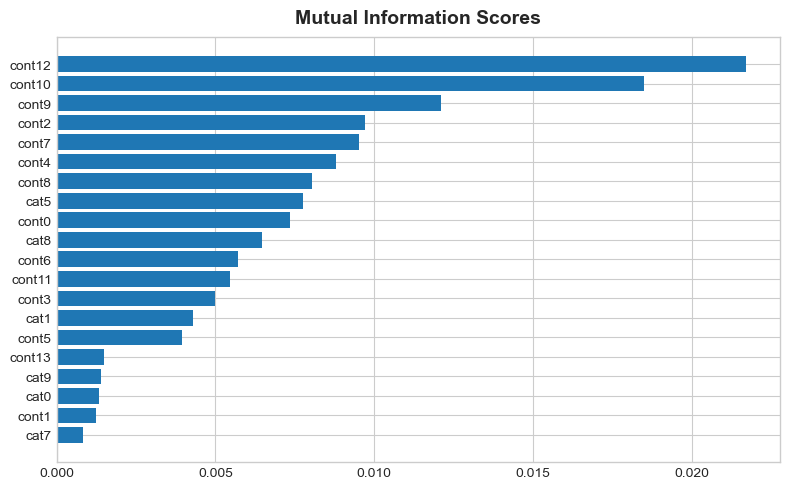

In [7]:
mi_scores = make_mi_scores(X, y)


print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

In [30]:
list_of_cols = mi_scores.head(15).index

X = X[list_of_cols]

X.head()

,cont12,cont10,cont9,cont2,cont7,cont4,cont8,cat5,cont0,cat8
id,,,,,,,,,,
1,0.322401,0.237281,0.267559,0.669699,0.310921,0.610706,0.389470,B,0.201470,C
2,0.261975,0.906013,0.341439,1.021605,0.516294,0.276853,0.594928,D,0.743068,A
3,0.541474,0.748809,0.843531,-0.012673,0.902567,0.285074,0.555205,D,0.742708,A
4,0.540150,0.346010,0.574844,0.577942,0.732948,0.284667,0.679618,D,0.429551,C
6,0.625849,1.000773,0.956692,-0.052389,0.648182,0.287595,0.684501,D,1.058291,A


In [31]:
from sklearn.model_selection import train_test_split

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)


In [32]:
#Finding all the object columns with their number of unique values and storing the values in 

d = {}

for col in X_train_full.columns:
    if X_train_full[col].dtype == "object":
        d[col] = X_train_full[col].nunique()


for k,v in d.items():
    print(k,v)


    
obj_cols = []
# getting all the columns names into  a list
for k,v in d.items():
    obj_cols.append(k)
    
    


cat5 4
cat8 7


In [33]:
#Getting numeric columns

numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

print(numeric_cols)

for i in range(0,len(numeric_cols)):
    print(numeric_cols[i], X_train_full[numeric_cols[i]].nunique())


['cont12', 'cont10', 'cont9', 'cont2', 'cont7', 'cont4', 'cont8', 'cont0']
cont12 239780
cont10 239745
cont9 239780
cont2 239844
cont7 239799
cont4 239822
cont8 239790
cont0 239766


In [34]:
X_train = X_train_full.copy()
X_valid = X_valid_full.copy()
X_test = X_test_full.copy()


In [35]:
#one hot encoding the data

X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [36]:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import xgboost


regressor = XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


regressor.fit(X_train, y_train, 
             early_stopping_rounds=7, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
# Get predictions
predictions = regressor.predict(X_valid) # Your code here

# Calculate MAE
mae = mean_absolute_error(predictions, y_valid) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae)


Mean Absolute Error: 0.5784235793713607


In [29]:
#getting predections from the test data 

pred_test = regressor.predict(X_test)



# Save test predictions to file
output = pd.DataFrame({'id': X_test.index,
                       'target': pred_test})
output.to_csv('submission.csv', index=False)
